In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import model_based_agent as mba 
import worm_env as we 
import ensemble_mod_env as eme

from improc import *
import utils as ut
import tab_agents as tab
from datetime import datetime 

In [3]:
frac_on = 1/2
collection_ep_time = 600 # in seconds. Must be a multiple of worm_ep_len
worm_ep_len = 120 # in seconds
init_df = None # with folder 


folder = './Data/HTDeb'+datetime.now().strftime('%d-%m-%H-%M')+'/'
if os.path.isdir(folder):
    os.rmdir(folder)
os.mkdir(folder)

# Initialize objects
dh = mba.DataHandler()
if init_df is not None:
    dh.load_df(init_df)
worm = we.ProcessedWorm(0,ep_len=worm_ep_len,ht_time=3) 

for ce in range(4):
# Collecting random data
#############################
    fname = folder+f'collect{ce}.pkl'
    mba.get_init_traj(fname, worm, int(collection_ep_time/worm_ep_len), rand_probs=[1-frac_on,frac_on])
    dh.add_dict_to_df([fname],reward_ahead=10,timestep_gap=1,prev_act_window=3,jump_limit=100)

HT switched [930 239]
HT switched [929 220]
HT switched [935 210]
HT switched [950 208]
HT switched [965 209]
HT switched [975 203]
HT switched [981 185]
HT switched [995 182]
HT switched [1008  170]
HT switched [1018  162]
HT switched [1034  148]
HT switched [1006  169]
HT switched [1014  159]
HT switched [985 169]
HT switched [971 170]
HT switched [956 174]
HT switched [940 168]
HT switched [930 163]
HT switched [925 150]
HT switched [920 142]
HT switched [921 146]
HT switched [929 153]
HT switched [914 141]
HT switched [892 136]
HT switched [883 114]
HT switched [871 101]
HT switched [864  94]


C:\Users\ccli3\Documents\Research\20_09_07_NewPC\RLWorms\01_13_reals\improc.py:196: RuntimeWarning: invalid value encountered in longlong_scalars
  centers.append(np.array([np.sum(np.arange(im_sz)*sumx) / np.sum(sumx), np.sum(np.arange(im_sz)*sumy) / np.sum(sumy)]))


HT switched [854  85]
HT switched [752  87]
HT switched [726  96]
HT switched [709 101]
HT switched [696 106]
HT switched [683 114]
HT switched [670 119]
HT switched [663 132]
HT switched [650 139]
HT switched [638 133]
HT switched [622 144]
HT switched [614 149]
HT switched [605 168]
HT switched [592 173]
HT switched [584 186]
HT switched [578 198]
HT switched [582 184]
HT switched [587 177]
HT switched [587 188]
HT switched [591 195]
HT switched [604 220]
HT switched [620 229]
HT switched [603 221]
HT switched [600 210]
HT switched [584 208]
HT switched [570 209]
HT switched [554 214]
HT switched [537 215]
HT switched [523 213]
HT switched [508 211]
HT switched [481 207]
HT switched [470 211]
HT switched [440 223]
HT switched [ 398 1431]
HT switched [255 411]
HT switched [269 441]
HT switched [273 460]
HT switched [278 476]
HT switched [278 491]
HT switched [279 504]
HT switched [286 518]
HT switched [294 528]
HT switched [299 540]
HT switched [315 539]
HT switched [327 537]
HT switc

HT switched [888 872]
HT switched [890 874]
HT switched [889 872]
HT switched [899 853]
HT switched [902 857]
HT switched [897 857]
HT switched [890 869]
HT switched [903 855]
HT switched [899 858]
HT switched [890 873]
HT switched [890 873]
HT switched [892 854]
HT switched [900 856]
HT switched [888 876]
HT switched [887 870]
HT switched [895 858]
HT switched [888 876]
HT switched [889 870]
HT switched [894 856]
HT switched [901 856]
HT switched [889 876]
HT switched [891 866]
HT switched [887 876]
HT switched [894 871]
HT switched [885 872]
HT switched [887 867]
HT switched [891 874]
HT switched [890 874]
HT switched [887 875]
HT switched [889 871]
HT switched [887 876]
HT switched [884 872]
HT switched [890 874]
HT switched [887 871]
HT switched [893 870]
HT switched [890 875]
HT switched [895 856]
HT switched [889 876]
HT switched [886 874]
HT switched [899 856]
HT switched [894 861]
HT switched [888 876]
HT switched [901 855]
HT switched [897 863]
HT switched [884 873]
HT switche

In [6]:
dh.save_dfs('./Data/HTDeb18-01-15-20/noSwitch.pkl')

In [10]:
obs

-60

In [20]:
obs_b = np.zeros((len(dh.df)))
locs = np.zeros((len(dh.df),2))
for i,obs in enumerate(dh.df['obs_b']):
    obs_b[i] = obs
    locs[i,:] = dh.df['loc'][i]

In [8]:
dh.df.columns

Index(['t', 'obs_b', 'obs_h', 'prev_actions', 'next_obs_b', 'next_obs_h',
       'reward', 'loc'],
      dtype='object')

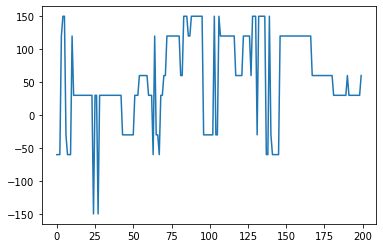

In [19]:
plt.plot(obs_b[:200])

In [32]:
mvt = np.sum(locs[:20,:]-locs[0,:],axis=0)

In [33]:
np.arctan2(mvt[1],mvt[0])*180/pi

-56.87514113685201

In [110]:
window=30
angs = []
for i in np.arange(window//2,len(locs)-window//2):
    mvt = np.sum(locs[i:i+window,:]-locs[i,:],axis=0)
    angs.append(np.arctan2(mvt[1],mvt[0])*180/pi)    
angs = np.hstack([np.zeros(window//2)+angs[0],angs,np.zeros(window//2)+angs[-1]])

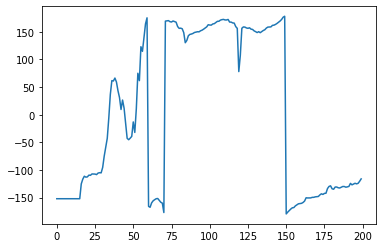

In [111]:
plt.plot(angs[:200])

In [114]:
ob_fix = ut.wrap_correct(obs_b.copy(),ref=angs)
for i,ang in enumerate(angs):
    if abs(ob_fix[i]-ang) > 90:
        ob_fix[i] += 180
ob_fix = ut.wrap_correct(ob_fix)

In [130]:
ad = angs-ob_fix
ad[ad>180] -= 360
ad[ad<-180] += 360

od = angs-obs_b
od[od>180] -= 360
od[od<-180] += 360

In [134]:
ad[abs(ad)-abs(od)>0]

array([], dtype=float64)

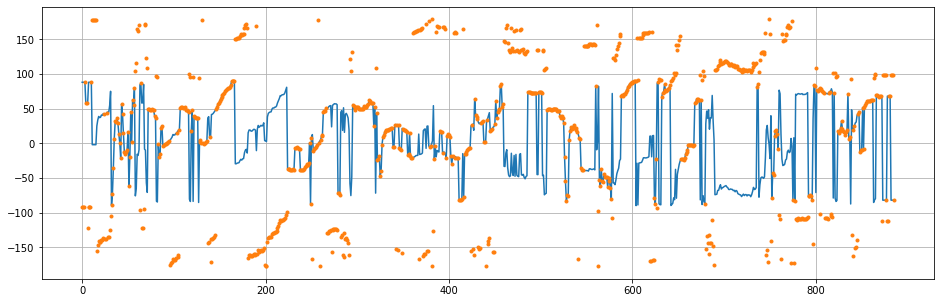

In [131]:
tmp=350
plt.figure(figsize=(16,5))
plt.plot(ad)
plt.plot(od,'.')
plt.grid();

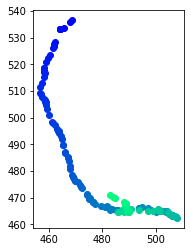

In [80]:
NPOINTS = 150
start = 200
fig,ax = plt.subplots(1)

ax.set_prop_cycle('color',plt.cm.winter(np.linspace(0,1,NPOINTS)))
for i in np.arange(start,start+NPOINTS-1):
    img = ax.scatter(locs[i,0],locs[i,1])
    ax.set_aspect('equal','box')

In [137]:
x = np.array([1,0])
np.flip(x)

array([0, 1])

In [146]:
dh.df['test'] = np.zeros(len(dh.df))+1

In [147]:
dh.df

,t,obs_b,obs_h,prev_actions,next_obs_b,next_obs_h,reward,loc,test
0,0.938,60,-30,0,60,30,0.222222,"[772.6538461538462, 1071.2307692307693]",1.0
1,1.125,60,30,1,60,30,0.501603,"[773.04, 1071.34]",1.0
2,1.297,60,30,2,60,30,0.819167,"[774.313725490196, 1071.313725490196]",1.0
3,1.485,60,30,3,60,0,1.226769,"[774.4285714285714, 1071.3265306122448]",1.0
4,1.688,60,0,2,60,-30,1.369084,"[775.7647058823529, 1071.5098039215686]",1.0
...,...,...,...,...,...,...,...,...,...
12764,117.782,150,0,1,-150,-60,4.692308,"[485.92857142857144, 557.7142857142857]",1.0
12765,117.954,-150,-60,0,-150,-90,4.587558,"[486.21428571428567, 557.6428571428571]",1.0
12766,118.157,-150,-90,1,-150,-90,4.817972,"[487.68421052631584, 557.3157894736842]",1.0
12767,118.344,-150,-90,2,-150,-90,3.409539,"[489.25, 556.7857142857143]",1.0


In [148]:
def correct_ht(df,window=30):
    # Takes a dataframe and fixes HT switches. 
    # df must have keys ['t', 'obs_b', 'angs', 'prev_actions', 'reward', 'loc']
    # Returns a dataframe with 'obs_h', 'next_obs_b', and 'next_obs_h'
    
    # Make a location array
    locs = np.zeros((len(df),2))
    obs_b = np.zeros((len(df),2))
    for i,loc in enumerate(df['loc']):
        locs[i,:] = loc
        obs_b[i,:] = df['obs_b']
        
    # Use location array to make direction of travel
    angs = []
    for i in np.arange(window//2,len(locs)-window//2):
        mvt = np.sum(locs[i-window//2:i+window//2,:]-locs[i-window//2,:],axis=0)
        angs.append(np.arctan2(mvt[1],mvt[0])*180/pi)    
    angs = np.hstack([np.zeros(window//2)+angs[0],angs,np.zeros(window//2)+angs[-1]])
    
    # Fixes observation by 180 deg. If it has to switch something, also switches angle.
    ob_fix = ut.wrap_correct(obs_b.copy(),ref=angs)
    for i,ang in enumerate(angs):
        if abs(ob_fix[i]-ang) > 90:
            ob_fix[i] += 180
            df['angs'] = np.flip(df['angs'])
    ob_fix = ut.wrap_correct(ob_fix)
    
    # Edits dataframe to reflect changes
    df['obs_b'] = ob_fix
    df.insert(len(df.columns),'obs_h',np.zeros((len(df))))
    df.insert(len(df.columns),'next_obs_b',np.zeros((len(df))))
    df.insert(len(df.columns),'next_obs_h',np.zeros((len(df))))
    for i in range(len(df)):
        df['obs_h'][i,:] = df['angs'][i,0]
    for i in range(len(df)-1):
        df['next_obs_b'][i,:] = df['obs_b'][i+1]
        df['next_obs_h'][i,:] = df['obs_h'][i+1]
    df['next_obs_b'][len(df)-1] = df['obs_b'][len(df)-1]
    df['next_obs_h'][len(df)-1] = df['obs_h'][len(df)-1]
    
    return df
        

In [149]:
def make_df(fname, 
    old_frame=None, 
    reward_ahead=10, 
    timestep_gap=1, 
    prev_act_window=3, 
    jump_limit=100,
    ):

    '''
    Takes a file and turns it into a trajectory dataframe.
    Can add to old data.
    Inputs:
                old_frame: old df
             reward_ahead: how many steps ahead to sum reward, for each table entry
             timestep_gap: how data are sampled (e.g. =5 means only every fifth datapoint is kept)
          prev_act_window: how many steps to look back to make sure all actions were 'on' or 'off'
               jump_limit: data are processed to remove faulty points where worm loc has jumped really far.
                           This is the maximum jump distance allowed before points are tossed.
                     disc: discretization of angles

    Output:
        dataframe object with keys:
            't', 'obs_b', 'angs', 'prev_actions', 'reward', 'loc'
    '''
    def add_ind_to_df(traj,df,i, reward_ahead, prev_act_window):
        # Assumes data for angle observations go from -1 to 1. 
        # This was because of use w/ normalized box wrapper with actual worm env
        ANG_BOUND = 180
        return df.append({
            't'           : traj['t'][i],
            'obs_b'       : int(traj['obs'][i][0]*ANG_BOUND),
            'angs'       : int(traj['angs'][i]*ANG_BOUND),
            'prev_actions': sum(traj['action'][i-prev_act_window:i]), # Note does not include current action
            'reward'      : sum(traj['reward'][i:i+reward_ahead]),
            'loc'         : traj['loc'][i],
        }, ignore_index=True)

    if old_frame is None:
        df = pd.DataFrame(columns = ['t', 'obs_b', 'angs', 'prev_actions', 'reward', 'loc'])
    else:
        df = old_frame

    # Loop through and remove problem points.
    newf = True
    with open(fname, 'rb') as f:
        traj = pickle.load(f)

    for i in np.arange(prev_act_window,len(traj['t'])-reward_ahead,timestep_gap):
        # For every timestep, check if the jump is reasonable and add to dataframe.
        if newf:
            if sum(traj['loc'][i])!=0:
                df = add_ind_to_df(traj,df,i,reward_ahead,prev_act_window)
                newf = False
        elif np.sqrt(np.sum(np.square(df['loc'].iloc[-1]-traj['loc'][i]))) < jump_limit:
            df = add_ind_to_df(traj,df,i,reward_ahead,prev_act_window)

    return df

In [152]:
df = make_df('./Data/HTDeb18-01-17-59/collect0.pkl')

KeyError: 'angs'

In [153]:
with open('./Data/HTDeb18-01-17-59/collect0.pkl','rb') as f:
    traj = pickle.load(f)

In [154]:
traj.keys()

dict_keys(['loc', 't', 'endpts', 'obs', 'reward', 'target', 'action'])